In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


# 3 Selecting µp pairs using detection observables
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/DetectionObservables/'

# pairs of tracks at close proximity

In [8]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

283762 ccqe candidate pairs, 186485 in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
I finished loading overlay samples. We have in total 283762 pairs
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [9]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
              ]


cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,'$p_t$ imbalance'
             ,r'$\Delta \phi $ \&  $p_{t}$'
            ]

reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt no delta phi,23.3%,92.4%,36.0%,69.0%,Pt no delta phi,23.3% (11582),1.8% (767),0.2% (185),36.0% (8646)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


# what is the best identification method for The µ and the p?

In [10]:
mup = reducedOverlay['no cut']['1mu-1p']

In [11]:
# 3.I.1 overview 
Ntot = len(mup)
# mu_long = mup[mup['l_long']==mup['l_muon']]
mu_long = mup[mup['pdg_long']==13]
N_mu_long = len(mu_long)
frac_mu_long = float(N_mu_long)/Ntot
print 'µ is long in %.2f'%(100*frac_mu_long),'%'

# p_long = mup[mup['l_long']==mup['l_proton']]
p_long = mup[mup['pdg_long']==2212]
N_p_long = len(p_long)
frac_p_long = float(N_p_long)/Ntot
print 'p is long in %.2f'%(100*frac_p_long),'%'


# mu_small_PIDa = mup[mup['l_small_PIDa']==mup['l_muon']]
mu_small_PIDa = mup[mup['pdg_small_PIDa']==13]
N_mu_small_PIDa = len(mu_small_PIDa)
frac_mu_small_PIDa = float(N_mu_small_PIDa)/Ntot
print 'µ with small PIDa in %.2f'%(100*frac_mu_small_PIDa),'%'


small_PIDa_long = mup[mup['pdg_small_PIDa']==mup['pdg_long']]
# small_PIDa_long = mup[mup['l_small_PIDa']==mup['l_long']]
N_small_PIDa_long = len(small_PIDa_long)
frac_small_PIDa_long = float(N_small_PIDa_long)/Ntot
print 'small PIDa = long in %.2f'%(100*frac_small_PIDa_long),'%'

# mu_small_PIDa_long = mup[(mup['l_small_PIDa']==mup['l_muon'])& (mup['l_long']==mup['l_muon'])]
mu_small_PIDa_long = mup[(mup['pdg_small_PIDa']==13)&(mup['pdg_long']==13)]
N_mu_small_PIDa_long = len(mu_small_PIDa_long)
frac_mu_small_PIDa_long = float(N_mu_small_PIDa_long)/Ntot




# mu as the track with larger Chi2Proton

print 'µ with small PIDa and long in %.2f'%(100*frac_mu_small_PIDa_long),'%'
print 
print 'in DetectionObservables.tex'
print '% paste below from notebook:'
print 
print '		In the method based on the track length, we found that a correct identification is obtained in $%.0f'%(100*frac_mu_long)+' \pm 1\%$ of the pairs. '
print '		In the method based on the $PID_a$, we found that a correct identification is obtained in $%.0f'%(100*frac_mu_small_PIDa)+' \pm 1\%$ of the pairs. '
print '		Combining the two methods, yields a correct identification in $%.0f'%(100*frac_mu_small_PIDa_long/frac_small_PIDa_long)+' \pm 1\%$ of the cases. '
print '		The combined selection costs a reduction of $%.0f'%(100*(1-frac_small_PIDa_long))+' \pm 1\%$ of the events, those in which the longer track was not the track with the smaller $PID_a$'

µ is long in 90.14 %
p is long in 9.86 %
µ with small PIDa in 86.78 %
small PIDa = long in 78.13 %
µ with small PIDa and long in 77.53 %

in DetectionObservables.tex
% paste below from notebook:

		In the method based on the track length, we found that a correct identification is obtained in $90 \pm 1\%$ of the pairs. 
		In the method based on the $PID_a$, we found that a correct identification is obtained in $87 \pm 1\%$ of the pairs. 
		Combining the two methods, yields a correct identification in $99 \pm 1\%$ of the cases. 
		The combined selection costs a reduction of $22 \pm 1\%$ of the events, those in which the longer track was not the track with the smaller $PID_a$


### 3.I.2 $PID_{a}$ of the proton and the muon candidates 

In [12]:
PIDaCut = 13

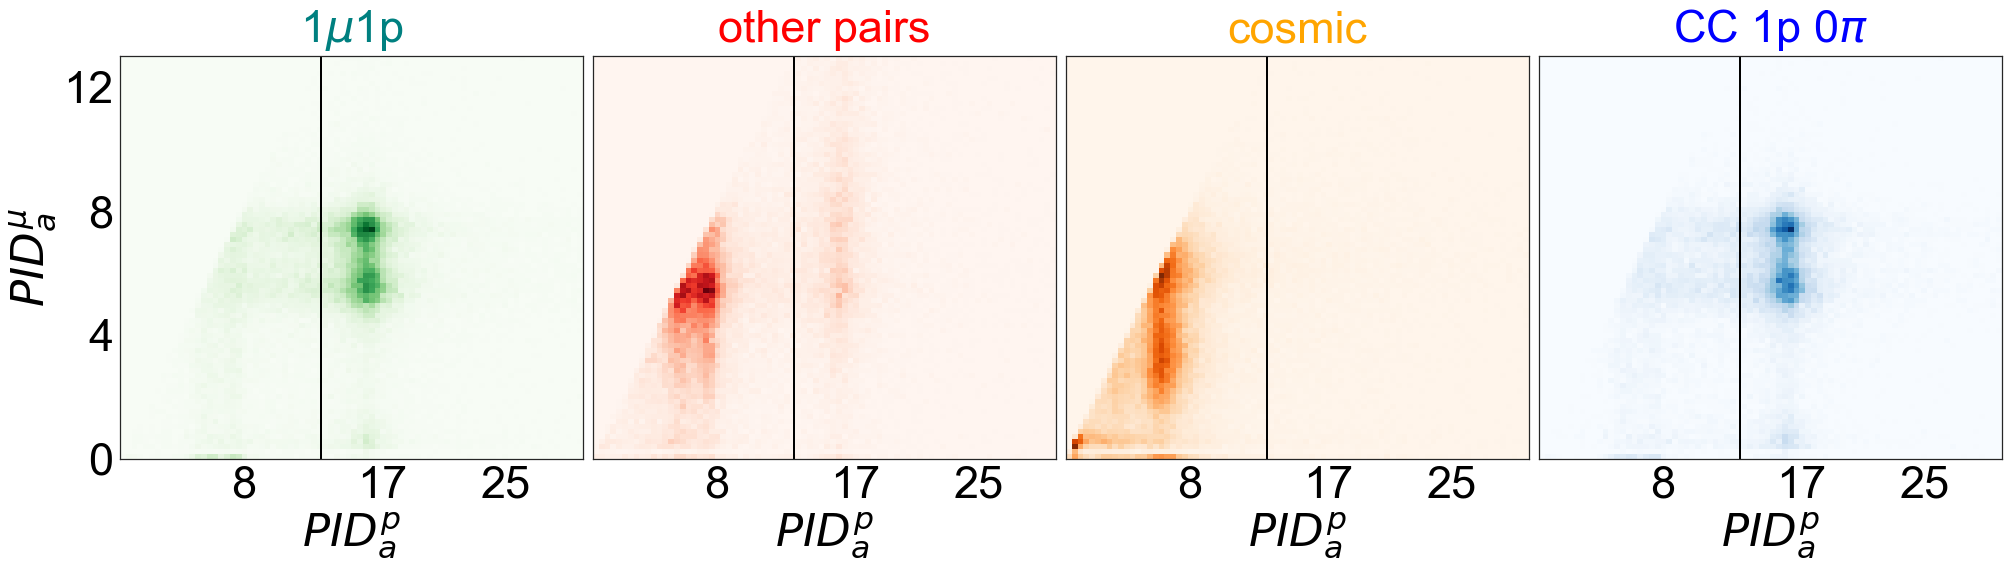

In [13]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,81),np.linspace(0,13,81))
x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reducedOverlay['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['pidcali_PIDaYplane_pCandidate'], sample['pidcali_PIDaYplane_muCandidate'], ax=ax,bins=bins,cmap=cmap)
    plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,xticks=[8,17,25],yticks=[0,4,8,12])
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa/PIDa_mu_p.pdf')

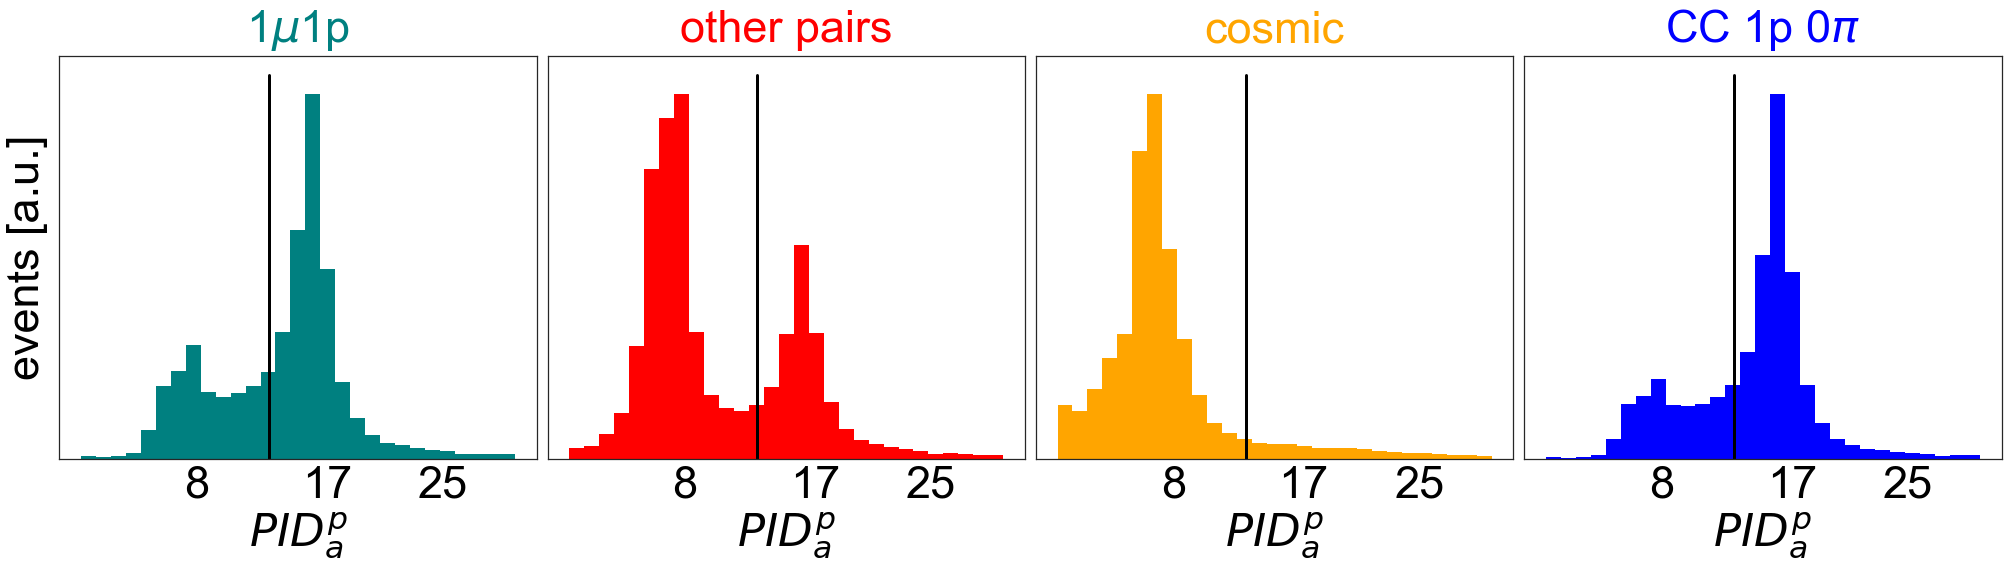

In [14]:
# 1D version
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,30))
x_label,y_label='$PID_{a}^{p}$','events [a.u.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reducedOverlay['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.hist(sample['pidcali_PIDaYplane_pCandidate'],bins=bins,color=color)
    plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black',linewidth=3)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45,xticks=[8,17,25],yticks=[0,4,8,12])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa/PIDa_p_1D.pdf')

# $\chi^2_{p-hypothesis}$

In [15]:
Chi2Proton_muCandidate_min=80
Chi2Proton_muCandidate_max=1000
Chi2Proton_pCandidate_min=0
Chi2Proton_pCandidate_max=30



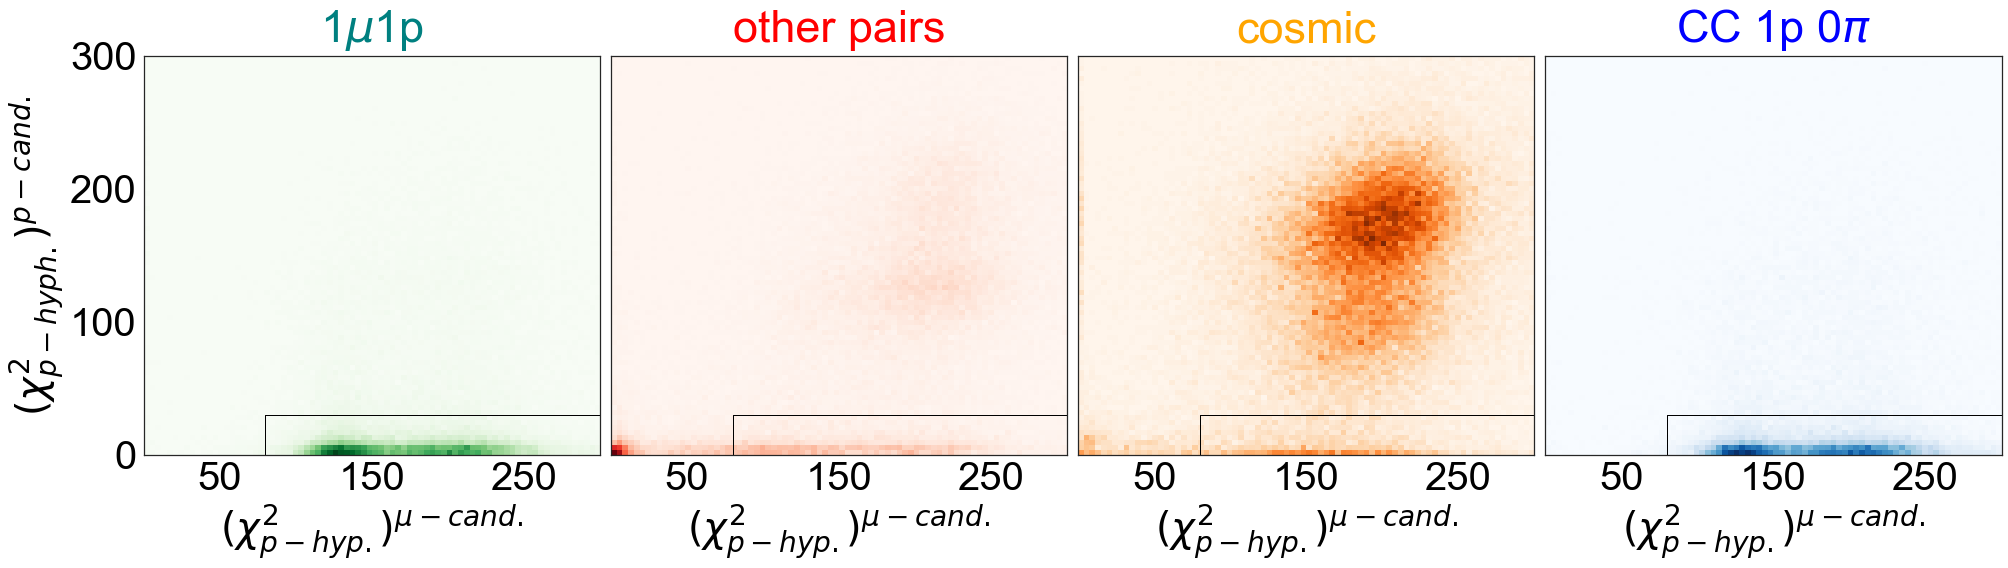

In [16]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,300,81),np.linspace(0,300,81))
x_label,y_label=r'$(\chi^2_{p-hyp.})^{\mu-cand.}$',r'$(\chi^2_{p-hyph.})^{p-cand.}$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reducedOverlay['no cut'][pair_type]
    sample = sample[(sample['pidcali_Chi2ProtonYplane_muCandidate']>0)&(sample['pidcali_Chi2ProtonYplane_pCandidate']>0)]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['pidcali_Chi2ProtonYplane_muCandidate']
                 , sample['pidcali_Chi2ProtonYplane_pCandidate'], ax=ax,bins=bins,cmap=cmap)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else ''
             ,fontsize=40
             ,xticks=[50,150,250]
             ,yticks=[0,100,200,300]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    plt.plot([Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_min],[Chi2Proton_pCandidate_min,Chi2Proton_pCandidate_max],'-'
                    ,[Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_max],[Chi2Proton_pCandidate_max,Chi2Proton_pCandidate_max],'-'
                    ,color='black',linewidth=1)
plt.tight_layout()
fig.savefig(figures_path+'Chi2Proton/Chi2Proton_mu_p.pdf')

### 3.I.3 flash matching

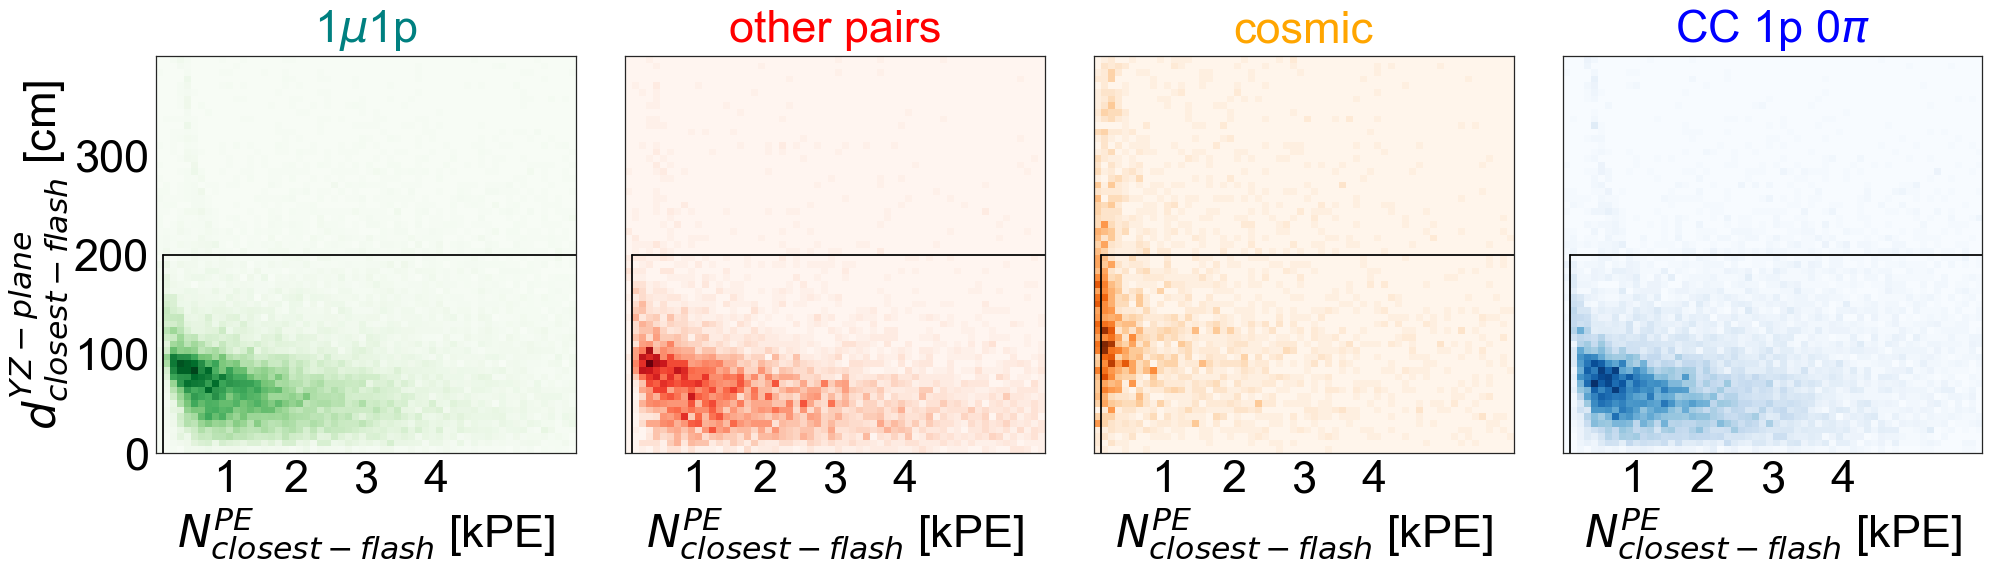

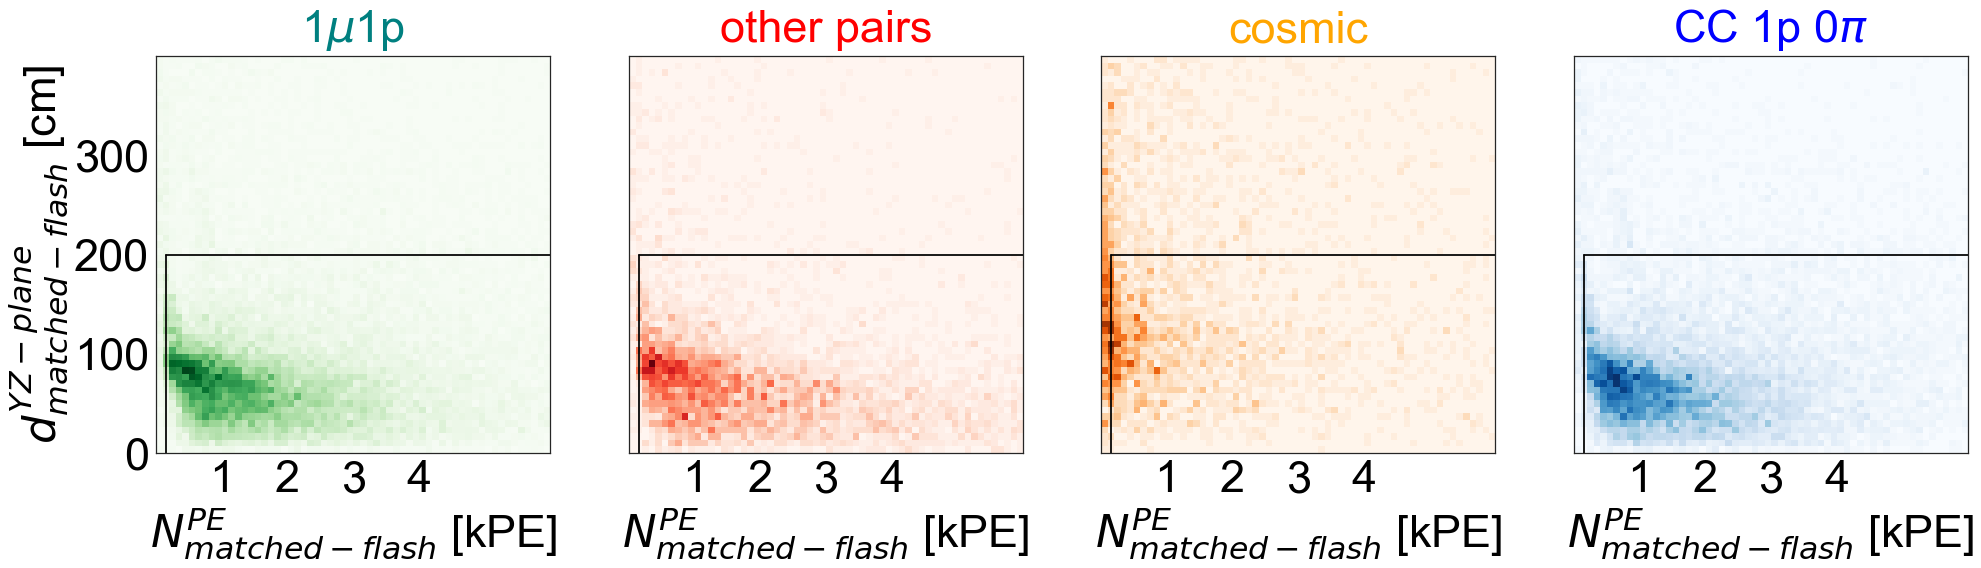

In [17]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,6,61),np.linspace(0,400,61))
maxdYZcut = 200
minPEcut = 0.1
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reducedOverlay['Chi2Proton'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(0.001*sample['ClosestFlash_TotalPE'], sample['ClosestFlash_YZdistance'], ax=ax,bins=bins,cmap=cmap)
    set_axes(ax,r'$N_{closest-flash}^{PE}$ [kPE]',r'$d_{closest-flash}^{YZ-plane}$ [cm]' if i==0 else '',fontsize=45
             ,xticks=[1,2,3,4],yticks=[0,100,200,300]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    
    ax.plot([minPEcut,minPEcut],[np.min(ax.get_ylim()),maxdYZcut],'-'
                    ,[minPEcut,np.max(ax.get_xlim())],[maxdYZcut,maxdYZcut],'-'
                    ,color='black')
plt.tight_layout()
fig.savefig(figures_path+'flashes/ClosestFlash_NPE_dYZ_after_dEdx_cut.pdf')

fig = plt.figure(figsize=(28,8))
minPEcut = 0.15
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reducedOverlay['Chi2Proton'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(0.001*sample['MatchedFlash_TotalPE'], sample['MatchedFlash_YZdistance'], ax=ax,bins=bins,cmap=cmap)
    set_axes(ax,r'$N_{matched-flash}^{PE}$ [kPE]',r'$d_{matched-flash}^{YZ-plane}$ [cm]' if i==0 else '',fontsize=45
             ,xticks=[1,2,3,4],yticks=[0,100,200,300]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    
    ax.plot([minPEcut,minPEcut],[np.min(ax.get_ylim()),maxdYZcut],'-'
                    ,[minPEcut,np.max(ax.get_xlim())],[maxdYZcut,maxdYZcut],'-'
                    ,color='black')
plt.tight_layout()
fig.savefig(figures_path+'flashes/MatchedFlash_NPE_dYZ_after_dEdx_cut.pdf')

##### 3.I.3 tracks length

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/DetectionObservables/length/l_mu_p.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/DetectionObservables/length/l_mu_p_after_dEdx_cut.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/DetectionObservables/length/l_mu_p_after_PMT_cut.pdf


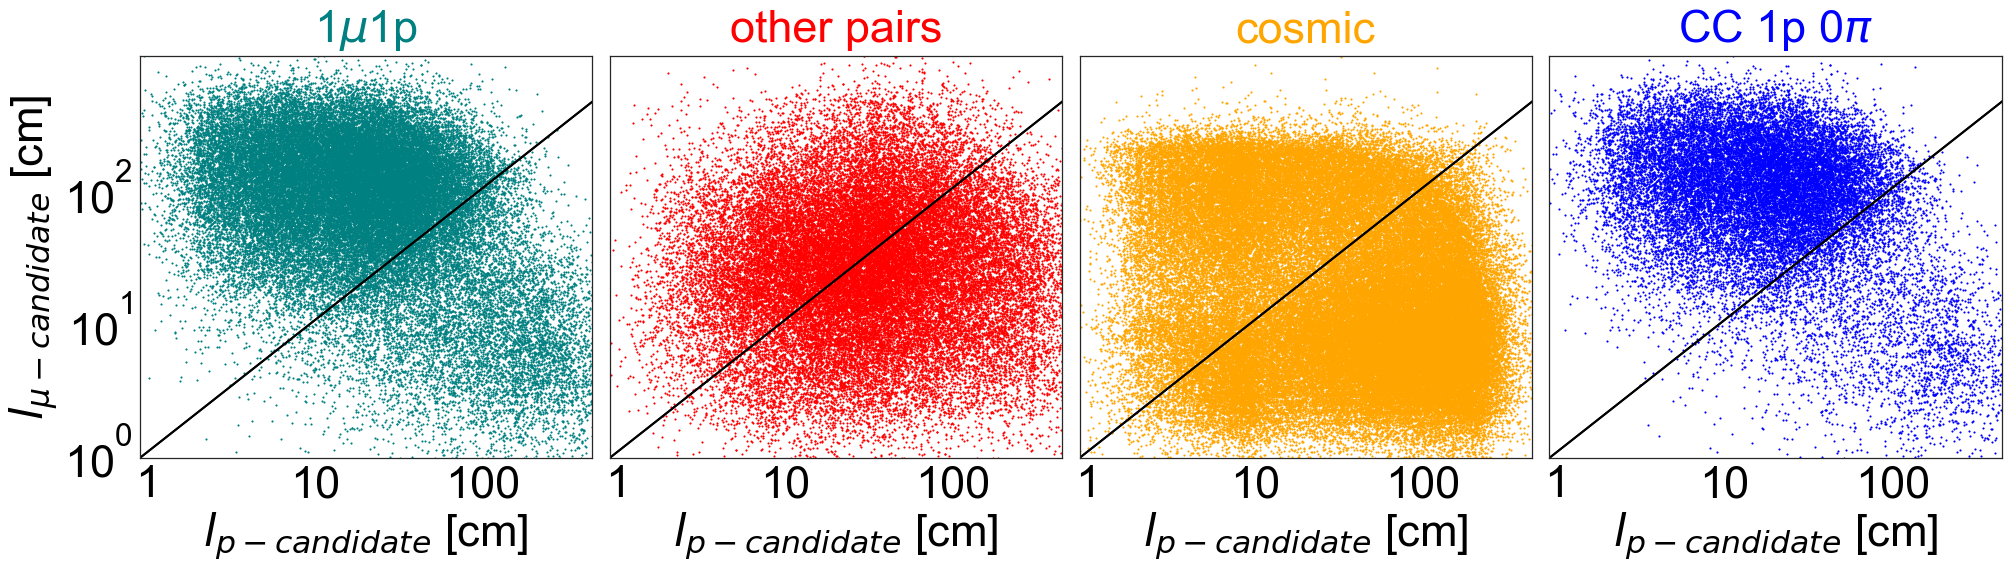

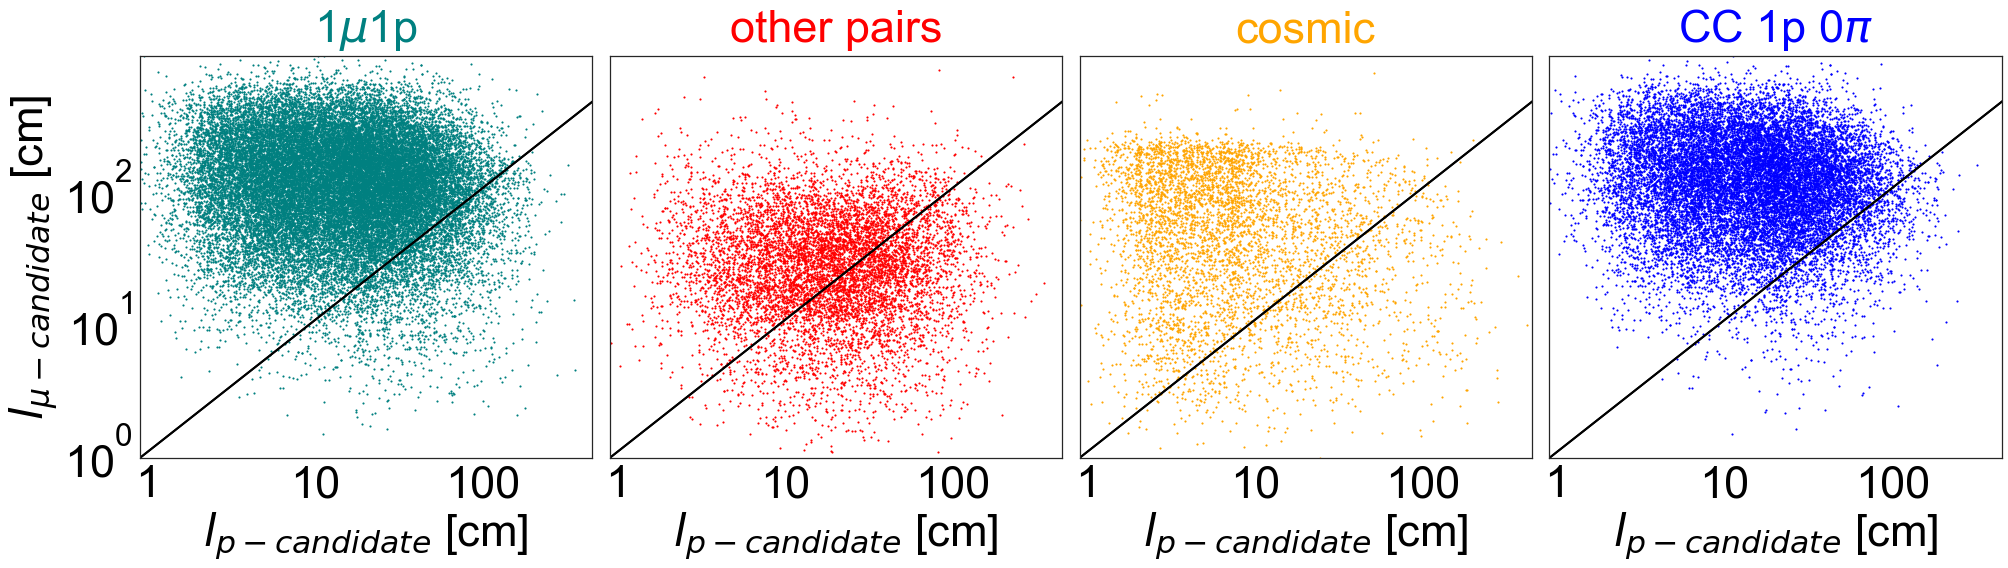

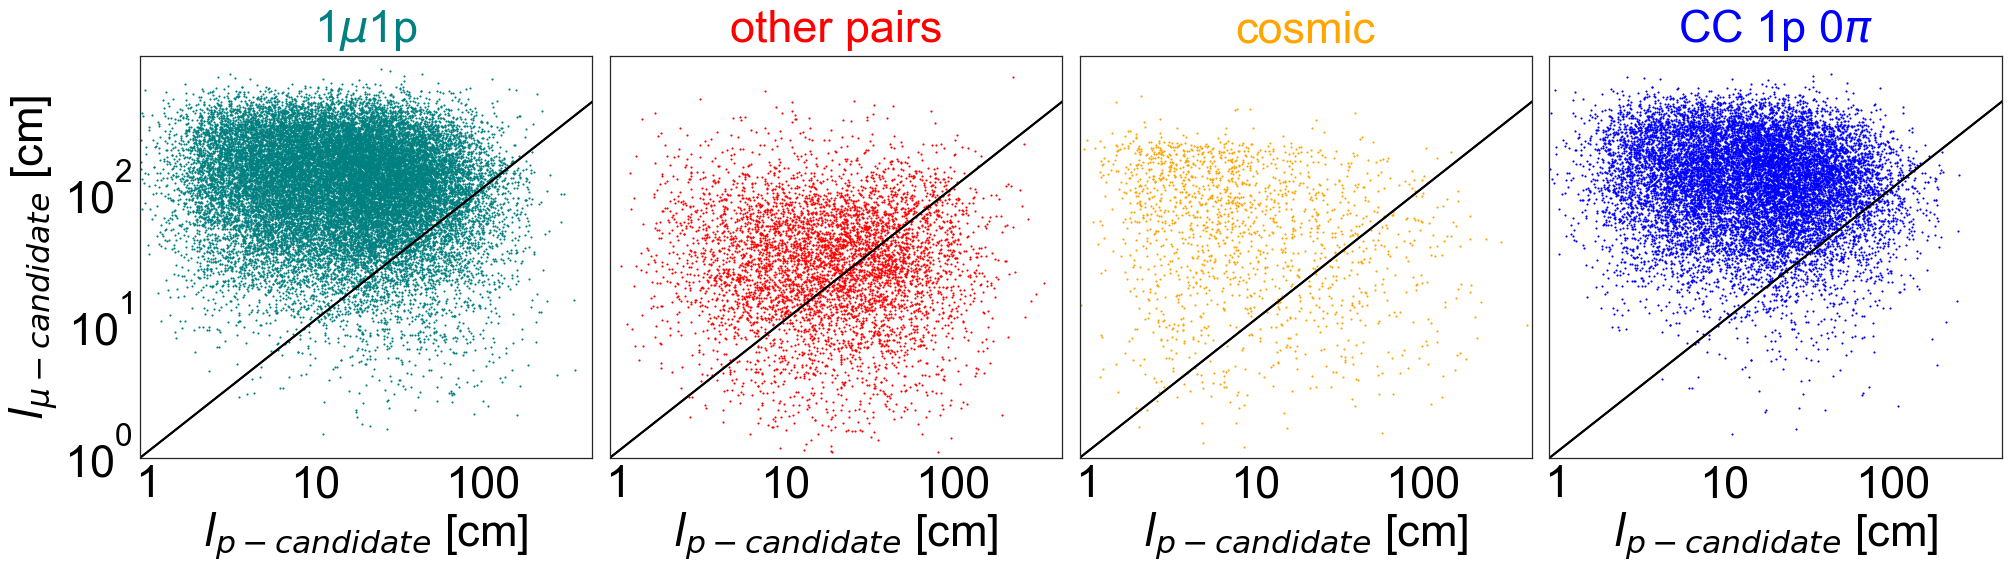

In [18]:
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p-candidate}$ [cm]',r'$l_{\mu-candidate}$ [cm]'

for cut_name,filesuffix in zip(['no cut','Chi2Proton','MatchedFlash']
                             ,['','_after_dEdx_cut','_after_PMT_cut']):
    fig = plt.figure(figsize=(28,8))
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
        sample = reducedOverlay[cut_name][pair_type]
        ax = fig.add_subplot(1,4,i+1)
        ax.set_title(label,fontsize=45,y=1.02,color=color)
        ax.scatter(sample['l_pCandidate'], sample['l_muCandidate'],color=color,s=3)
        ax.set_xlim(0.9,450);ax.set_xscale('log')
        ax.set_ylim(0.9,1000);ax.set_yscale('log')
        plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
        plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
        set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,xticks=[1,10,100],yticks=[1,10,100])    
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
        if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    plt.tight_layout()
    filename = figures_path+'length/l_mu_p'+filesuffix+'.pdf'
    fig.savefig(filename)
    print 'saved',filename

### 3.I.4 Non collinearity

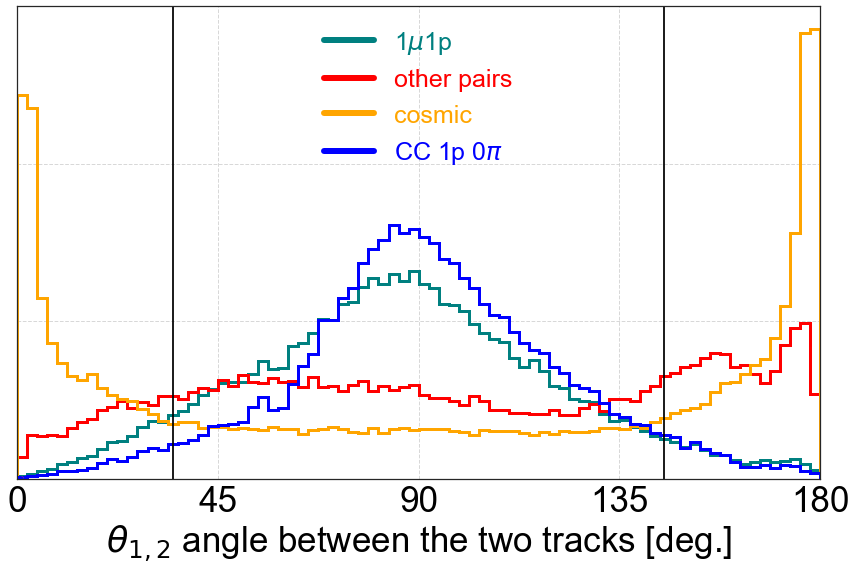

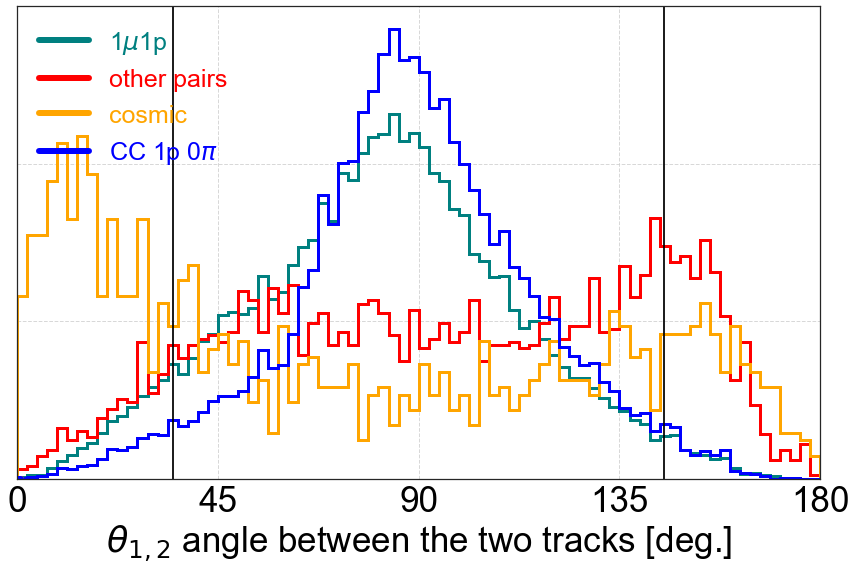

In [55]:
var='theta_12'
x_label=r'$\theta_{1,2}$ angle between the two tracks [deg.]'
ax=plot_feature_pairs(var=var,x_label=x_label,reduced_samples=reducedOverlay['no cut']
                              ,bins=np.linspace(0,180,81),do_add_legend=True
                              ,figsize=(12,8),fontsize=35,legend_loc='upper center',legend_fontsize=25)
ax.plot([35,35],ax.get_ylim(),'-',[145,145],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'collinearity/angle_between_tracks.pdf')

# after cut 2
ax=plot_feature_pairs(var=var,x_label=x_label,reduced_samples=reducedOverlay['length']
                              ,bins=np.linspace(0,180,81),do_add_legend=True
                              ,figsize=(12,8),fontsize=35,legend_loc='upper left',legend_fontsize=25)
ax.plot([35,35],ax.get_ylim(),'-',[145,145],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'collinearity/angle_between_tracks_after_length_cut.pdf')

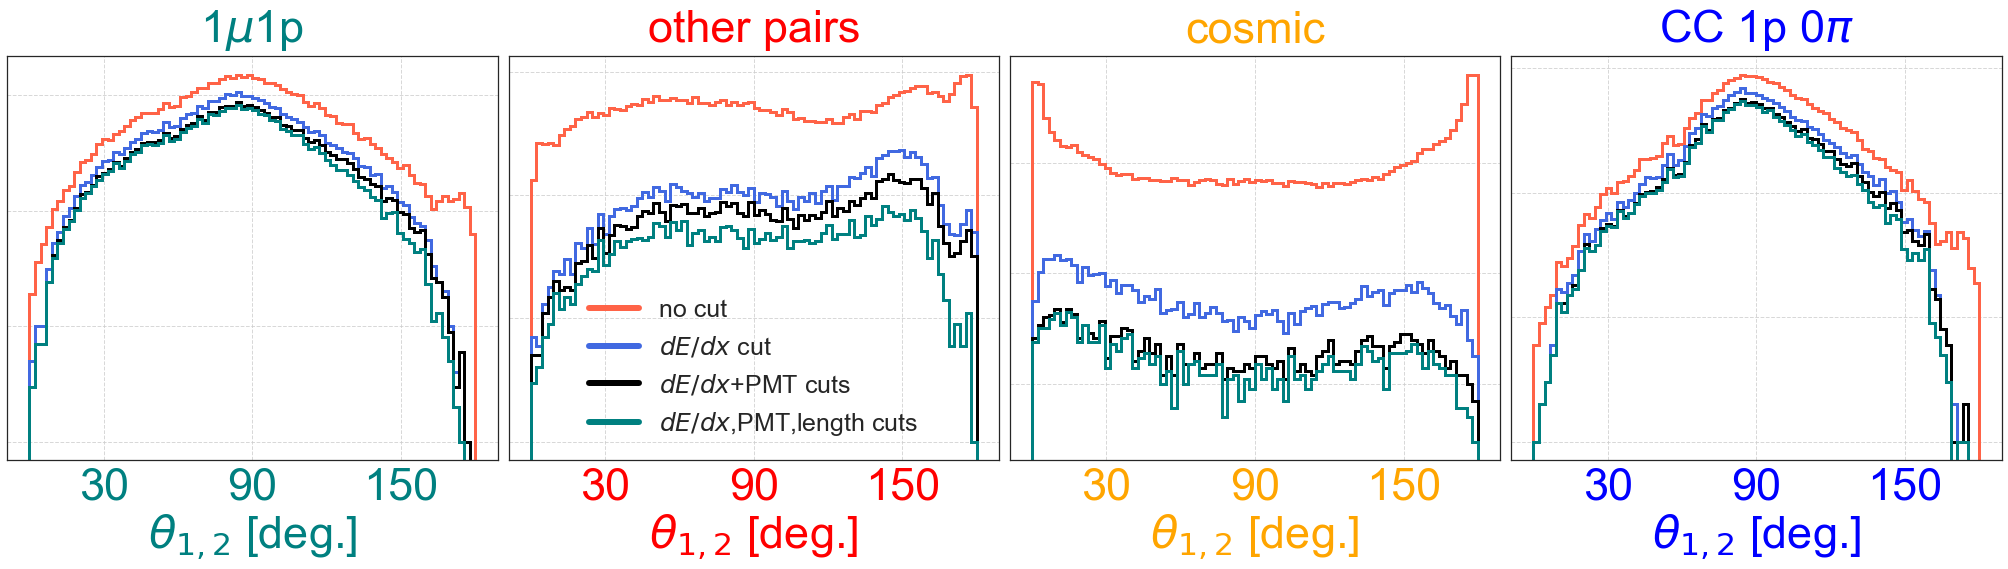

In [56]:
fig = plt.figure(figsize=(28,8))
bins=np.linspace(0,180,81)
x_label=r'$\theta_{1,2}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    for cut_name,s_color,s_label in zip(['no cut','Chi2Proton','MatchedFlash','length'] 
                                        ,['tomato','royalblue','black','teal']
                                        ,['no cut','$dE/dx$ cut','$dE/dx$+PMT cuts','$dE/dx$,PMT,length cuts']):
        sample = reducedOverlay[cut_name][pair_type]
        theta = sample['theta_12']
        plt.hist(theta,bins=bins,color=s_color,histtype='step',linewidth=3) #,normed=1
        p = plt.plot([0,0], label=s_label,linestyle='-',linewidth=6,color=s_color)
    set_axes(ax,x_label=x_label, y_label='',fontsize=45,xticks=[30,90,150],ticks_color=color,do_add_grid=True) 
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    if i==1: ax.legend(fontsize=25,loc='lower center')    
plt.tight_layout()
fig.savefig(figures_path+'collinearity/angle_between_tracks_before_after_cuts.pdf')

In [1]:
#---------------------------------------------------------------------------------------------
# Feb-14, 2018
def plot_cut_samples (reduced_samples=None,
                      markers_size=5,
                      cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=(12,8),fontsize=25,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, legend_loc='bbox',legend_fontsize=25,
                      ticks_color='black'):
    leg=None
    fig,ax=plt.subplots(figsize=figsize)
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
        sample = reduced_samples[pair_type]
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_err = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_err = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_err , xerr=0, fmt='o' , markersize=markers_size , label=label, color=color)
    if do_add_legend:
        if 'bbox' not in legend_loc:
            leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc,markerscale=2.)
        else:
            leg=ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,fontsize=legend_fontsize,markerscale=2.)
        for color,text in zip(MCcolors,leg.get_texts()):
            text.set_color(color)
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color=ticks_color,xticks=np.linspace(xmin,xmax,7),yticks=[25,50,75,100])
    ax.grid(linestyle='--',alpha=0.75)
    plt.tight_layout()
    if leg is None: return ax
    return ax,leg
#---------------------------------------------------------------------------------------------

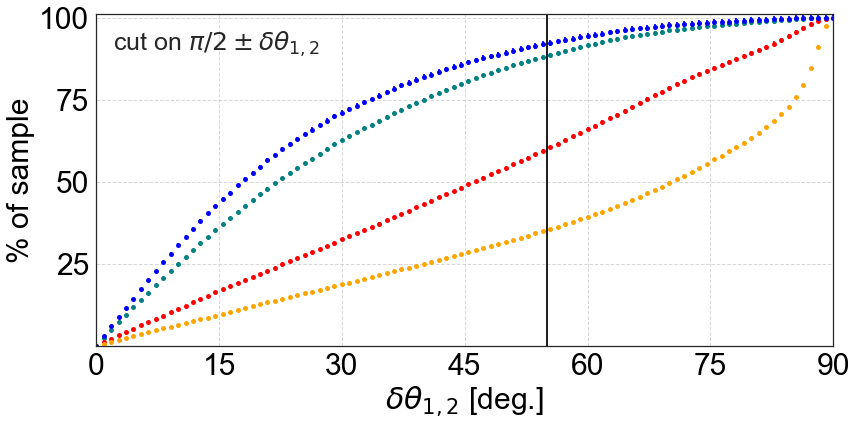

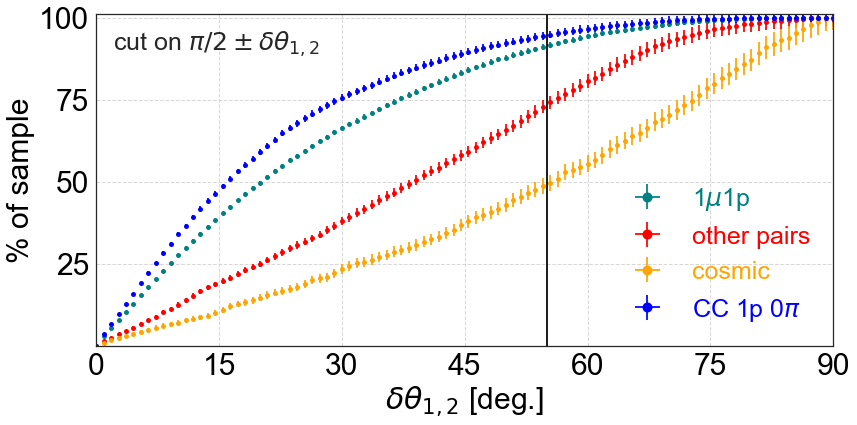

In [59]:
ax=plot_cut_samples(reduced_cut_name='no cut',cut_var ='theta_12',do_add_legend=False,
                     cut_type= 'symmetric',fontsize=30,figsize=(12,6),
                     x_label = r'$\delta \theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
ax.text(2,90,r'cut on $\pi/2 \pm \delta \theta_{1,2}$',fontsize=25)
ax.plot([55,55],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'collinearity/angle_between_tracks_cuts.pdf')#,bbox_extra_artists=(leg,), bbox_inches='tight')

# after cut 2
ax,leg=plot_cut_samples(reduced_cut_name='length',cut_var ='theta_12',do_add_legend=True,legend_loc='lower right',
                     cut_type= 'symmetric',fontsize=30,figsize=(12,6),
                     x_label = r'$\delta \theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.text(2,90,r'cut on $\pi/2 \pm \delta \theta_{1,2}$',fontsize=25)
plt.plot([55,55],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'collinearity/angle_between_tracks_cuts_after_length_cut.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### 0 FV cut

In [16]:

# ------------------------------------------------
def sample_in_FV(sample=None, max_FV_y = 140, # 115 in pandoraNu tracks collection
                 min_FV_z = 5, max_FV_z = 1037,
                 min_FV_x = 3, max_FV_x = 257): # 257
    sample_in_FV = sample[ 
                              (np.abs(sample['starty_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['starty_assigned_proton']) < max_FV_y)
                            & (np.abs(sample['endy_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['endy_assigned_proton']) < max_FV_y)
                            
                            & ((sample['startz_assigned_muon'] > min_FV_z) & (sample['startz_assigned_muon'] < max_FV_z) )
                            & ((sample['startz_assigned_proton'] > min_FV_z) & (sample['startz_assigned_proton'] < max_FV_z) )                            
                            & ((sample['endz_assigned_muon'] > min_FV_z) & (sample['endz_assigned_muon'] < max_FV_z) )
                            & ((sample['endz_assigned_proton'] > min_FV_z) & (sample['endz_assigned_proton'] < max_FV_z) )

                            & ((sample['startx_assigned_muon'] > min_FV_x) & (sample['startx_assigned_muon'] < max_FV_x) )
                            & ((sample['startx_assigned_proton'] > min_FV_x) & (sample['startx_assigned_proton'] < max_FV_x) )                            
                            & ((sample['endx_assigned_muon'] > min_FV_x) & (sample['endx_assigned_muon'] < max_FV_x) )
                            & ((sample['endx_assigned_proton'] > min_FV_x) & (sample['endx_assigned_proton'] < max_FV_x) )
                           ]
    return sample_in_FV
# ------------------------------------------------


In [17]:
pairs = pd.read_csv(vertices_files_path+'prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_vertices.csv')
MCbnbDATAcosmicPairsFV = sample_in_FV(pairs, max_FV_y = 110, # 115 in pandoraNu tracks collection
                 min_FV_z = 5, max_FV_z = 1037,
                 min_FV_x = 3, max_FV_x = 250)
print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
print len(MCbnbDATAcosmicPairsFV),'pairs in FV'

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV


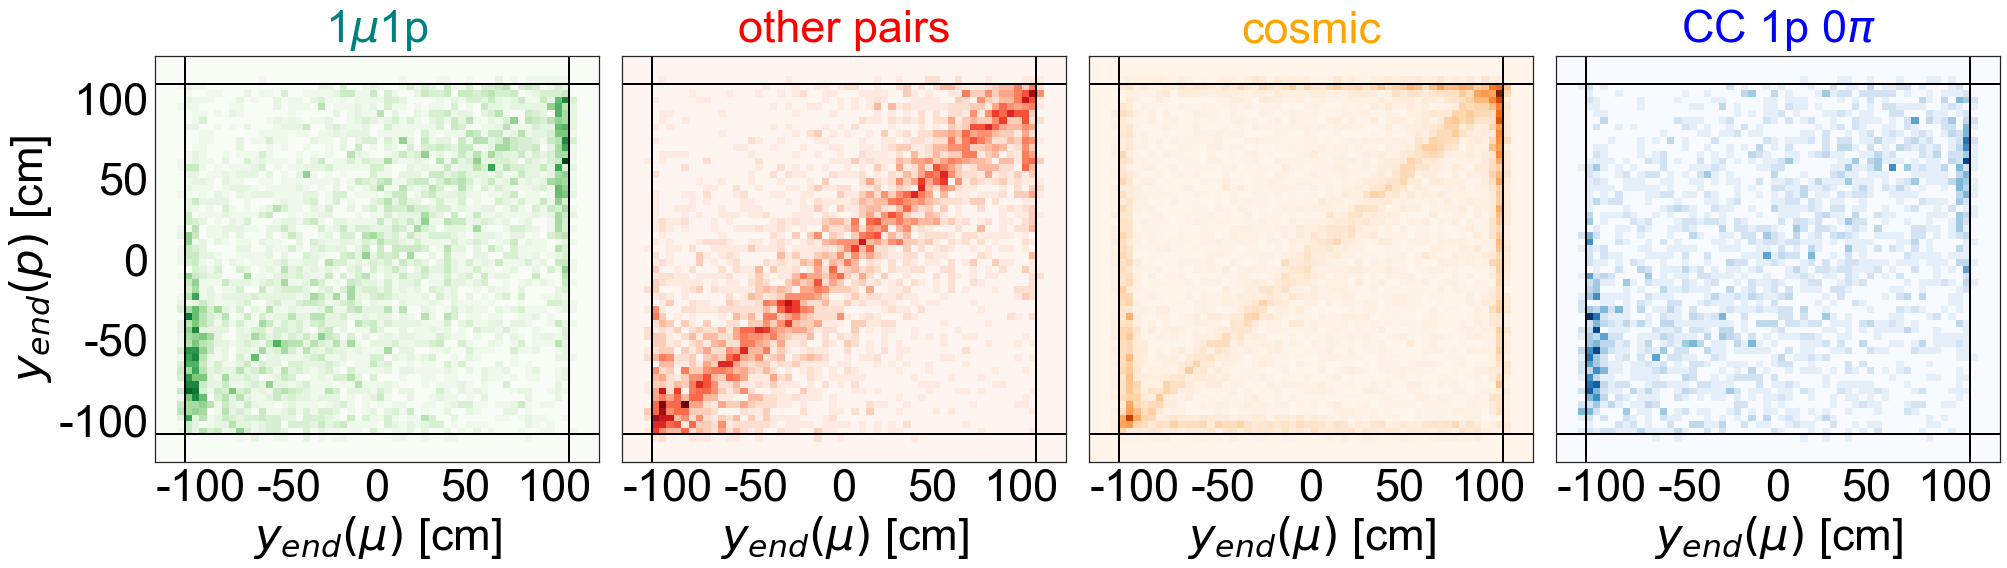

In [18]:
xCut = [3,250]
yCut = [-109,109]
zCut = [5,1037]
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['endy_assigned_muon'], sample['endy_assigned_proton']
                 ,ax=ax,fontsize=25
                 ,bins=(np.linspace(-126,126,61),np.linspace(-126,126,61))
                 ,cmap=cmap,norm='')
    
    plt.plot([yCut[0],yCut[0]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot([yCut[1],yCut[1]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[0],yCut[0]],'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[1],yCut[1]],'-',color='black',linewidth=2)
    set_axes(ax
             ,x_label=r'$y_{end}(\mu)$ [cm]'
             ,y_label=r'$y_{end}(p)$ [cm]' if i==0 else ''
             ,ticks_color='black',fontsize=45
            )
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/FVcut.pdf')

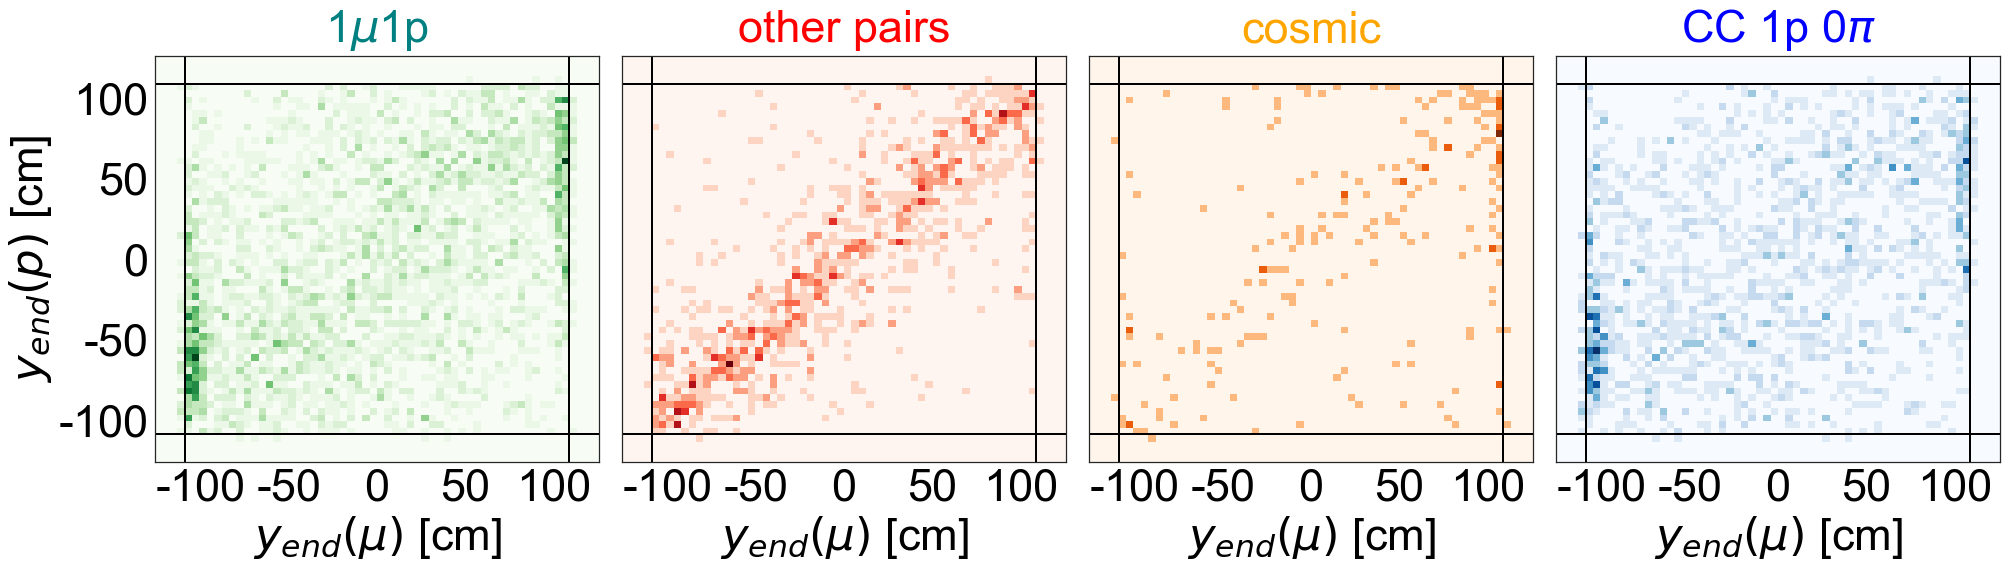

In [19]:
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['endy_assigned_muon'], sample['endy_assigned_proton']
                 ,ax=ax,fontsize=25
                 ,bins=(np.linspace(-126,126,61),np.linspace(-126,126,61))
                 ,cmap=cmap,norm='')
    
    plt.plot([yCut[0],yCut[0]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot([yCut[1],yCut[1]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[0],yCut[0]],'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[1],yCut[1]],'-',color='black',linewidth=2)
    set_axes(ax
             ,x_label=r'$y_{end}(\mu)$ [cm]'
             ,y_label=r'$y_{end}(p)$ [cm]' if i==0 else ''
             ,ticks_color='black',fontsize=45
            )
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/FVcut_after_non_collinearity.pdf')

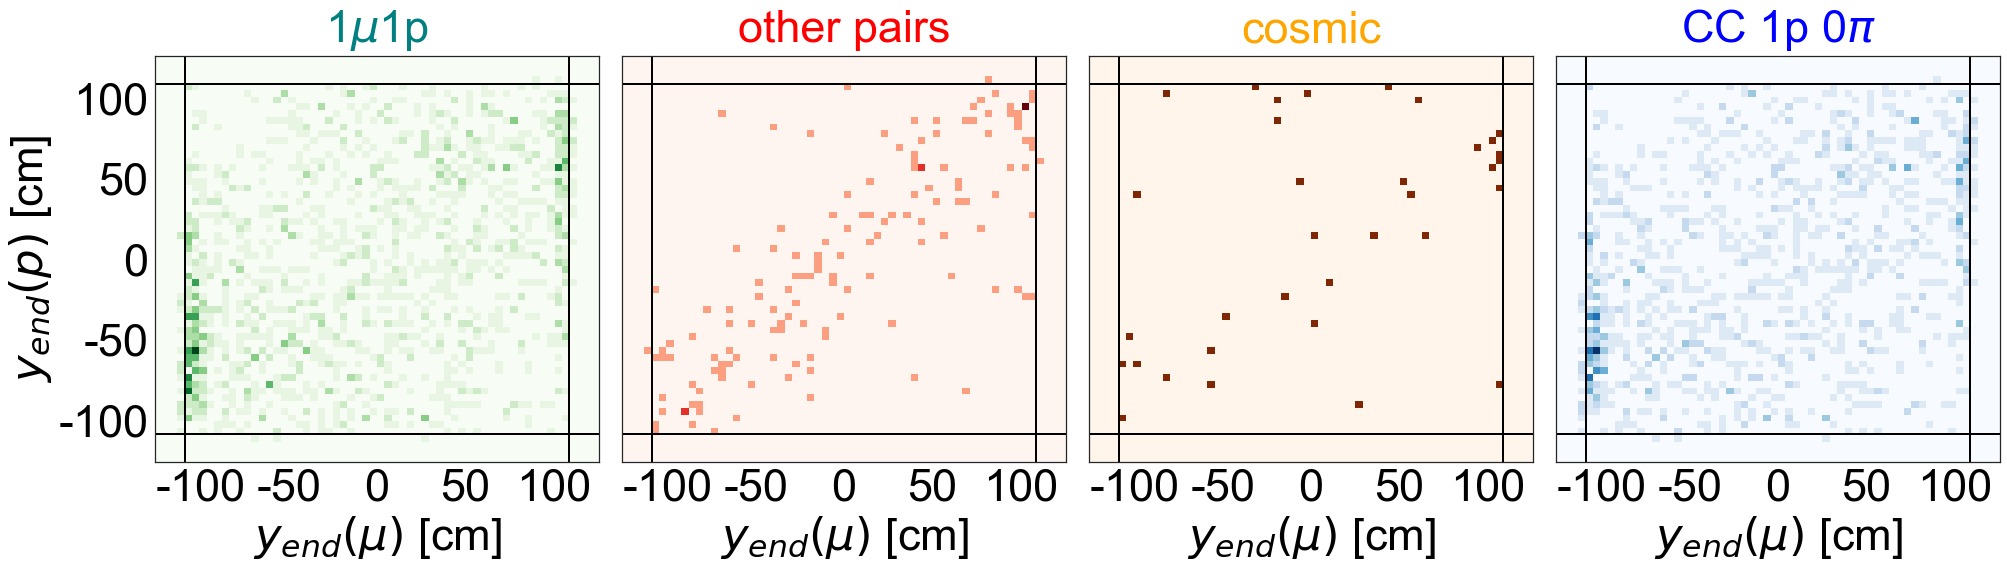

In [20]:
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['endy_assigned_muon'], sample['endy_assigned_proton']
                 ,ax=ax,fontsize=25
                 ,bins=(np.linspace(-126,126,61),np.linspace(-126,126,61))
                 ,cmap=cmap,norm='')
    
    plt.plot([yCut[0],yCut[0]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot([yCut[1],yCut[1]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[0],yCut[0]],'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[1],yCut[1]],'-',color='black',linewidth=2)
    set_axes(ax
             ,x_label=r'$y_{end}(\mu)$ [cm]'
             ,y_label=r'$y_{end}(p)$ [cm]' if i==0 else ''
             ,ticks_color='black',fontsize=45
            )
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/FVcut_after_delta_phi.pdf')

## 3.III Removing events with large energy deposit by undetected particles 
take event-display images and distributions from 
### RdQaroundVertex_box_optimization.ipynb